# Figure 6: Spirals 2D data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import h5py

import EIANN.utils as ut
import EIANN.plot as pt
from EIANN.generate_figures import *

pt.update_plot_defaults()
root_dir = ut.get_project_root()

%load_ext autoreload
%autoreload 2

In [65]:
figure_name = "Fig6_spirals"
model_list = ["vanBP_2_hidden_zero_bias_spiral", "vanBP_2_hidden_learned_bias_spiral", "bpDale_learned_bias_spiral", "DTP_learned_bias_spiral"]
model_dict_all = load_model_dict()
generate_hdf5_all_seeds(model_list, model_dict_all, dataset='spiral', recompute=None)

Generating plots for Backprop (ANN, no bias)
Generating plots for Backprop (ANN, learned bias)
Generating plots for Backprop (EIANN, learned bias)
Generating plots for Dend. Target Prop. (learned bias)


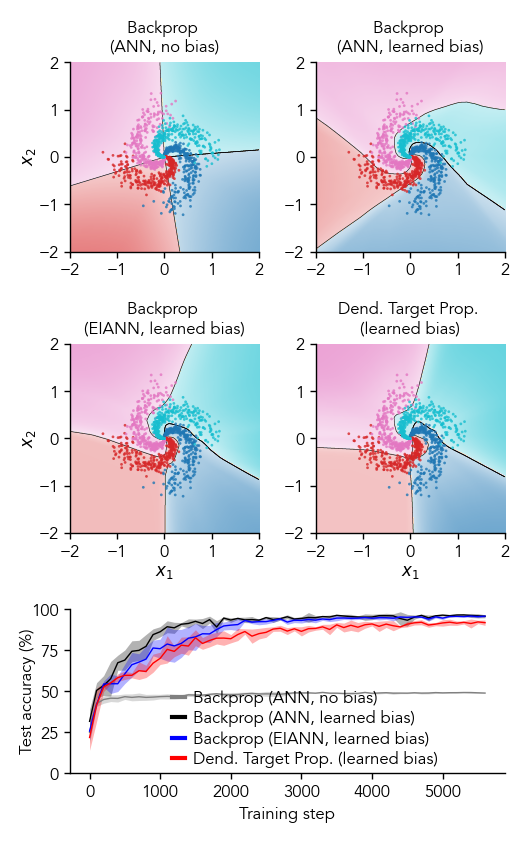

In [139]:
fig = plt.figure(figsize=(2.5,4.1))
axes = gs.GridSpec(nrows=2, ncols=2, figure=fig,                    
                    left=0.11, right=0.98, top=0.94, bottom=0.36, wspace=0.3, hspace=0.45)

ax_accuracy =   fig.add_subplot(gs.GridSpec(nrows=1, ncols=1, figure=fig,
                    left=0.11, right=0.98, top=0.27, bottom=0.07)[0])

model_dict_all["bpDale_learned_bias_spiral"]["label"] = "Backprop (EIANN, learned bias)"
model_dict_all["DTP_learned_bias_spiral"]["label"] = "Dend. Target Prop. (learned bias)"
model_dict_all["vanBP_2_hidden_zero_bias_spiral"]["label"] = "Backprop (ANN, no bias)"
model_dict_all["vanBP_2_hidden_learned_bias_spiral"]["label"] = "Backprop (ANN, learned bias)"

for key in model_dict_all:
    model_dict_all[key]["title"] = model_dict_all[key]["label"].replace("(", "\n(")


for i, model_key in enumerate(model_list):
    model_dict = model_dict_all[model_key]
    network_name = model_dict['config'].split('.')[0]
    hdf5_path = root_dir + f"/EIANN/data/model_hdf5_plot_data/plot_data_{network_name}.h5"
    with h5py.File(hdf5_path, 'r') as f:
        data_dict = f[network_name]
        print(f"Generating plots for {model_dict['label']}")
        seed = model_dict['seeds'][0] # example seed to plot

        # Plot spirals
        ax = fig.add_subplot(axes[i])
        decision_data = data_dict[seed]['spiral_decision_data_dict']
        pt.plot_spiral_decisions(decision_data, ax=ax)
        ax.set_aspect('equal')
        ax.set_title(model_dict["title"], pad=4, fontsize=6)
        if i < 2:
            ax.set_xlabel('')
        if i%2!=0:
            ax.set_ylabel('')
        ax.set_ylabel(ax.get_ylabel(), labelpad=0)
        ax.set_xlabel(ax.get_xlabel(), labelpad=1)

        # Plot metrics
        plot_accuracy_all_seeds(data_dict, model_dict, ax=ax_accuracy)

fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.png", dpi=300)
fig.savefig(f"{root_dir}/EIANN/figures/{figure_name}.svg", dpi=300)